In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Для начала загрузим данные для работы и посмотрим на их размеры.

In [2]:
# Загрузка данных из представленных файлов
codebook = pd.read_csv("data/HackerRank-Developer-Survey-2018-Codebook.csv")
numeric_mapping = pd.read_csv("data/HackerRank-Developer-Survey-2018-Numeric-Mapping.csv")
country_mapping = pd.read_csv("data/Country-Code-Mapping.csv")

numeric = pd.read_csv("data/HackerRank-Developer-Survey-2018-Numeric.csv", low_memory=False)
values = pd.read_csv("data/HackerRank-Developer-Survey-2018-Values.csv", low_memory=False)

# Размеры данных
print("Codebook        shape: ", codebook.shape)
print("Numeric mapping shape: ", numeric_mapping.shape)
print("Country_mapping shape: ", country_mapping.shape)
print("Numeric shape: ", numeric.shape)
print("Values  shape: ", values.shape)

Codebook        shape:  (251, 3)
Numeric mapping shape:  (452, 3)
Country_mapping shape:  (152, 2)
Numeric shape:  (25090, 251)
Values  shape:  (25090, 251)


### Находим количество участников из каждой страны.

In [3]:
country_users_values = values["CountryNumeric2"].value_counts()
country_users_values.size

152

### Как видно из результата работы предыдущей строчки,количество стран слишком велико,чтобы изобразить их всех на одной гистограмме, построим лишь 15 самых распространенных.


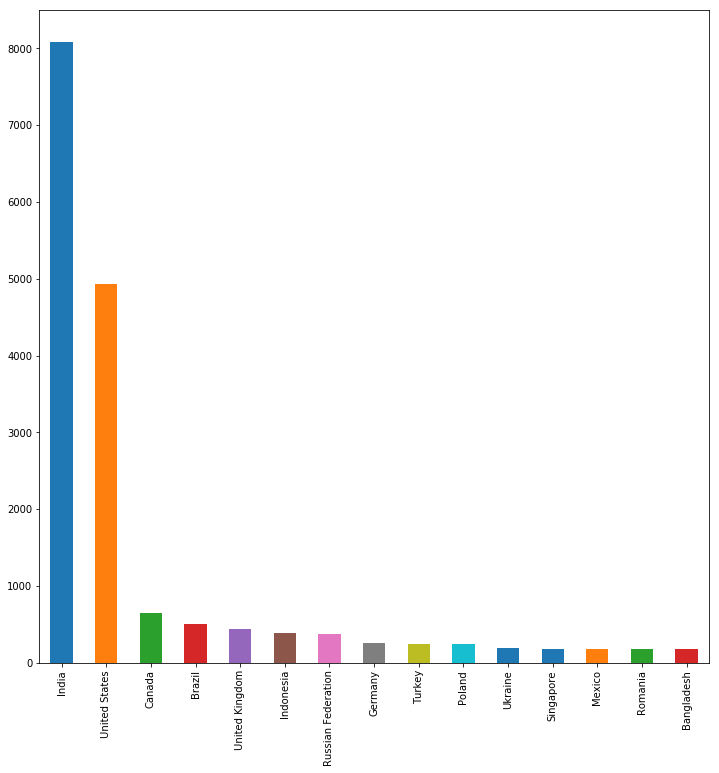

In [4]:
country_users_values[:15].plot.bar(figsize=(12, 12))

## Перейдем к вопросу №1 :
## Какое число опрошенных программистов из России?

### Преобразуем тип Series в словарь и по ключу 'Russian Federation' извлекаем количество.


In [5]:
print("Ответ: ", country_users_values.to_dict()['Russian Federation'])

Ответ:  378


## Второй вопрос:
## Какой процент от программистов из России – студенты?
### Для этого извлекаем из values только пользователей из России и оставляем графу об образовании (q4Education).

In [6]:
rus_edu = values[values["CountryNumeric2"] == "Russian Federation"]["q4Education"]
rus_edu.head()

105                                    #NULL!
213                      High school graduate
214    Some post graduate work (Masters, PhD)
215    Some post graduate work (Masters, PhD)
216    Some post graduate work (Masters, PhD)
Name: q4Education, dtype: object

### Удалим из выборки отсутствующие данные и построим диаграмму.

Уровни образования : 
 College graduate                          111
Post graduate degree (Masters, PhD)        98
Some post graduate work (Masters, PhD)     89
High school graduate                       42
Some college                               23
Some high school                           12
Vocational training (like bootcamp)         1
Name: q4Education, dtype: int64


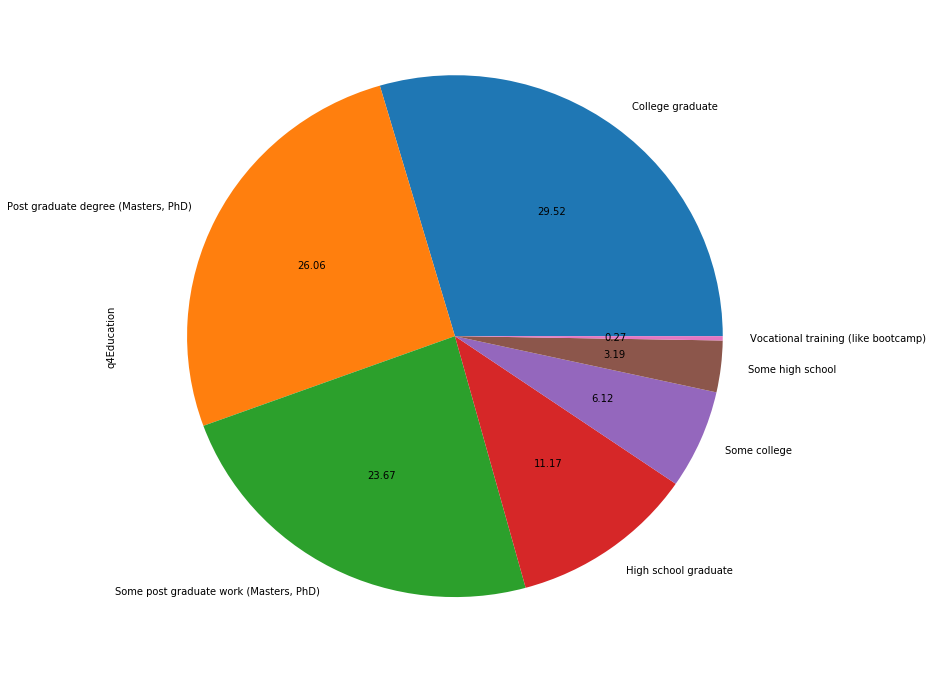

In [7]:
rus_edu_score = rus_edu.value_counts().drop("#NULL!")
print("Уровни образования : \n",rus_edu_score)
rus_edu_score.plot.pie(autopct='%.2f',figsize=(12, 12))

### Очевидно,cтудентами являются пользователи ответившие на вопрос Some college или Some high school. Посчитаем их количество.

In [8]:
rus_dict = rus_edu.value_counts().to_dict()
second_result = rus_dict['Some high school'] + rus_dict['Some college']
print("Ответ: {} %".format(second_result / len(rus_edu) * 100))

Ответ: 9.25925925925926 %


## Вопрос №3 :
## Какой процент от общего числа опрошенных сейчас занимается Data Science? Web-разработкой? Мобильной разработкой?

### Аналогично предыдущему вопросу выделим из данных графу "q0005_other" и посчитаем итоговые значения.

In [9]:
field_dict = values["q0005_other"].value_counts().to_dict()
print(values["q0005_other"].value_counts()[:15] ,"\n\nКоличество уникальных ответов : ", values["q0005_other"].value_counts().size)

Economics                        58
Business                         41
Information Technology           30
Computer Engineering             24
Software Engineering             20
Electronics                      20
Linguistics                      20
Philosophy                       19
Political Science                18
Electronics and communication    18
Psychology                       18
Finance                          17
Information technology           17
Music                            15
English                          14
Name: q0005_other, dtype: int64 

Количество уникальных ответов :  930


### Так как каждый пользователь отвечал по-своему, найдем реальное количество пользователей в нужных областях  помощью ключевых слов.

In [10]:
web_keys    = []
datas_keys  = []
mobile_keys = []

for k in field_dict:
    kl = k.lower()
    if "web" in kl:
        web_keys.append(kl)
    elif "data" in kl or "machine" in kl or "learning" in kl or "artificial" in kl or "ai" in kl:
        datas_keys.append(kl)
    elif "mobile" in kl or "ios" in kl or "andriod" in kl:
        mobile_keys.append(kl)
        
print("Web keys:      ", web_keys, "\n")
print("Data sc. keys: ", datas_keys, "\n")
print("Mobile keys:   ", mobile_keys, "\n")

Web keys:       ['web development', 'web development', 'finance,banking,income tax officer,web developer', 'software & web development', 'full stack web developer', 'web design and development', 'full stack web development', 'web', 'web developement', 'web development', 'it applied to web and multimedia design / it applied to digital animation'] 

Data sc. keys:  ['machine learning, python, ios development and networking', 'airlines management', 'data analytics', 'machine learning and ai', 'software engineering, ai, machine learning', 'artificial intelligence', 'supply chain, history', 'deep learning and a.i.', 'learning technologies', 'databases', 'data science machine learning', 'artificial intelligence', 'data science', 'data analytics, finance', 'computer science and machine learning', 'data comms and software engineering', 'computer science and artificial intelligence', 'ai', 'machine learning', 'ba - philosophy , ms - data analytics', 'technology, database', 'supply chain managem

### Как видно из результата некоторые ключи не являются правильными,создаем специальный массив с плохими значениями. При итоговом подсчете количества пользователей по областям, будем проверять наличие ключа в "плохом массиве".

In [11]:
# Массивы неправильных значений
web_bad_keys    = []
datas_bad_keys  = ['technology, database', 'data comms and software engineering', 'airlines management', 'databases'
                  'international affairs', 'supply chain, history']
mobile_bad_keys = ['dip in automobile engg']

# Результаты
web_result = 0
datas_result = 0
mobile_result = 0

# считаем количество
for k in field_dict:
    kl = k.lower()
    if kl in web_keys and kl not in web_bad_keys:
        web_result += field_dict[k]
    elif kl in datas_keys and kl not in datas_bad_keys:
        datas_result += field_dict[k]
    elif kl in mobile_keys and kl not in mobile_bad_keys:
        mobile_result += field_dict[k]

print("Web:                {} %".format(web_result / len(field_dict) * 100))
print("Data science:       {} %".format(datas_result / len(field_dict) * 100))
print("Mobile Development: {} %".format(mobile_result / len(field_dict) * 100))


Web:                1.5053763440860215 %
Data science:       3.4408602150537635 %
Mobile Development: 0.21505376344086022 %


## Вопрос №4 
## Какой процент от программистов из России правильно ответили на каждый вопрос?

### Для ответа на этот вопрос откроем таблицу CodeBook и найдем поля содержащие ответы на вопросы.

In [12]:
codebook["Notes"].value_counts().to_dict()

columns_names = []
for k in codebook["Notes"].value_counts().to_dict():
    if 'right answer' in k.lower():
        columns_names.append(k)
columns_names

['right answer: 1 or \'prints  "Hello World!" n times\'',
 'right answer: 1 or num%2 == 0',
 'right answer: 1 or C',
 'right answer: 2 or Queue']

### Преобразуем найденные значения в формат удобный для проверки данных:

### Словарь [ Код ответа : [ правильные ответы ] ]

In [13]:
import re  # Используется чтобы удалить двойные пробелы в значинии правильного ответа

data_field_cols = {}
for name in columns_names:
    val = list(codebook[codebook["Notes"] == name]["Data Field"])[0]
    data_field_cols[val] = name
    

for k in data_field_cols:
    splitted_by_right_ans = data_field_cols[k].split("right answer: ")[1]
    splitted_by_or = splitted_by_right_ans.split("or", 1)
    splitted_by_or = [re.sub(' +', ' ', i.strip().replace("\'", "")) for i in splitted_by_or]
    data_field_cols[k] = splitted_by_or
    
print(data_field_cols)

{'q36Level4': ['2', 'Queue'], 'q15Level2': ['1', 'prints "Hello World!" n times'], 'q7Level1': ['1', 'C'], 'q31Level3': ['1', 'num%2 == 0']}


### Аналогично предыдущим вопросам достаем из values пользователей из России и необходимые графы с ответами.

In [14]:
rus_ans = values[values["CountryNumeric2"] == "Russian Federation"][[k for k in data_field_cols]]
rus_ans_len = rus_ans.shape[0]
rus_ans[:10]

,q36Level4,q15Level2,q7Level1,q31Level3
105,Queue,"prints ""Hello, World!"" n times",C,num%2 == 0
213,Hashmap,"prints ""Hello, World!"" n times",C,num%2 == 0
214,Hashmap,"prints ""Hello, World!"" n times",C,num%2 == 0
215,Queue,"prints ""Hello, World!"" n times",C,num%2 == 0
216,Queue,"prints ""Hello, World!"" n times",C,num%2 == 0
555,Queue,"prints ""Hello, World!"" n times",C,num%2 == 0
595,Set,"prints ""Hello, World!"" n times",C,num%2 == 0
808,Queue,"prints ""Hello, World!"" n times",C,num%2 == 0
812,Queue,"prints ""Hello, World!"" n times",C,num%2 == 0
905,Queue,"prints ""Hello, World!"" n times",C,num%2 == 0


### Подсчитаем количество правильных ответов

In [15]:
average = 0
right_answers = [data_field_cols[k] for k in data_field_cols]

for index, row in rus_ans.iterrows():
    to_add = True
    for i in range(len(rus_ans.columns)):
        if row[rus_ans.columns[i]].replace(",", "").strip() not in data_field_cols[rus_ans.columns[i]]:
            to_add = False
            break
    
    if to_add:
        average += 1
        
print("Ответ: {} %".format(average / len(rus_ans) * 100))

Ответ: 77.5132275132275 %



## Ответы на вопросы :

### Вопрос 1 : 378
### Вопрос 2 : 9.25925925925926 %
### Вопрос 3 : Web:                1.5053763440860215 % , Data science:       3.4408602150537635 % ,Mobile Development: 0.21505376344086022 %
### Вопрос 4 : 77.5132275132275 %

# Дополнительные метрики

### Предположение: чем раньше человек начал заниматься программированием, тем на большее количество вопросов он ответил правильно. Посчитаем коэффициент корреляции Пирсона между разницей в текущем возрасте и возрастом, когда человек начал программировать с соответствующим количеством очков. У нас 4 столбца с вопросами, будем считать, что за каждый правильный ответ участник получает 25 баллов - максимум 100 баллов. Также посмотрим топ-15 стран по сумме набранных баллов.

### Создадим копию numeric и будем ставить над этими данными эксперименты и чистить их

In [16]:
copy_numeric = numeric.copy(deep=True)
copy_numeric.head(5)

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
0,6464453728,10/19/17 11:51,10/20/17 12:05,148.0,3,3,2,3,NaN,1,...,1,datacamp,1,1,NaN,2,NaN,#NULL!,NaN,2
1,6478031510,10/26/17 6:18,10/26/17 7:49,164.0,3,4,1,7,NaN,2,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,2
2,6464392829,10/19/17 10:44,10/19/17 10:56,98.0,2,2,2,3,NaN,2,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,2
3,6481629912,10/27/17 1:51,10/27/17 2:05,43.0,2,2,1,5,NaN,1,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,3
4,6488385057,10/31/17 11:46,10/31/17 11:59,NaN,3,4,2,5,NaN,0,...,1,Blogs/articles by industry leaders,1,1,NaN,2,NaN,#NULL!,NaN,3


### Очистим данные от #NULL!, заменив их на np.nan. Определим правильные ответы и столбцы, соответствующие им.

In [17]:
copy_numeric['q2Age'] = copy_numeric['q2Age'].replace(to_replace={'#NULL!': np.nan}, inplace=False)
copy_numeric['q1AgeBeginCoding'] = copy_numeric['q1AgeBeginCoding'].replace(to_replace={'#NULL!': np.nan}, inplace=False)
copy_numeric['q36Level4'] = copy_numeric['q36Level4'].replace(to_replace={'#NULL!': -1}, inplace=False)


num_right_answers = [int(i[0]) for i in right_answers]
cols_right_answers = rus_ans.columns.tolist() # Столбцы можно взять из rus_ans
print(num_right_answers, cols_right_answers)

[2, 1, 1, 1] ['q36Level4', 'q15Level2', 'q7Level1', 'q31Level3']


### Найдем количество очков для каждого участника

In [19]:
points = []
for index, row in copy_numeric.iterrows():
    num = 0
    for i in range(len(cols_right_answers)):
        if int(row[cols_right_answers[i]]) == num_right_answers[i]:
            num+=1
            
    
    points.append(num * 25)
print(len(points))

25090


###  Сформируем новый DataFrame с нужными нам столбцами. Добавим в него страну. Удалим строки с NaN

In [20]:
data = {
    'q2Age': copy_numeric['q2Age'].tolist(),
    'q1AgeBeginCoding': copy_numeric['q1AgeBeginCoding'].tolist(),
    'score': points,
    'country': values["CountryNumeric2"],
    
}
scoreFrame = pd.DataFrame(data=data)
print("Before: ", scoreFrame.shape)

# dropna
scoreFrame = scoreFrame.dropna(how='any')
print("After: ", scoreFrame.shape)

Before:  (25090, 4)
After:  (21056, 4)


### Добавим столбец разницы между возрастом и AgeBeginCoding

In [22]:
scoreFrame['q2Age'] = pd.to_numeric(scoreFrame['q2Age'])
scoreFrame['q1AgeBeginCoding'] = pd.to_numeric(scoreFrame['q1AgeBeginCoding'])

scoreFrame['yearsCoding'] = scoreFrame['q2Age'] - scoreFrame['q1AgeBeginCoding']
scoreFrame[scoreFrame['yearsCoding'] < 0] = 0
scoreFrame['yearsCoding'].unique()

array([0, 1, 3, 2, 4, 5, 7, 6])

### Посчитаем корреляцию двух столбцов

In [23]:
scoreFrame['yearsCoding'].corr(scoreFrame['score'], method='pearson')

0.20004610302048334

### Коэффициент корреляции небольшой, можно говорить о том, что эти метрики плохо связаны

### Посчитаем сумму очков у каждой страны и построим график

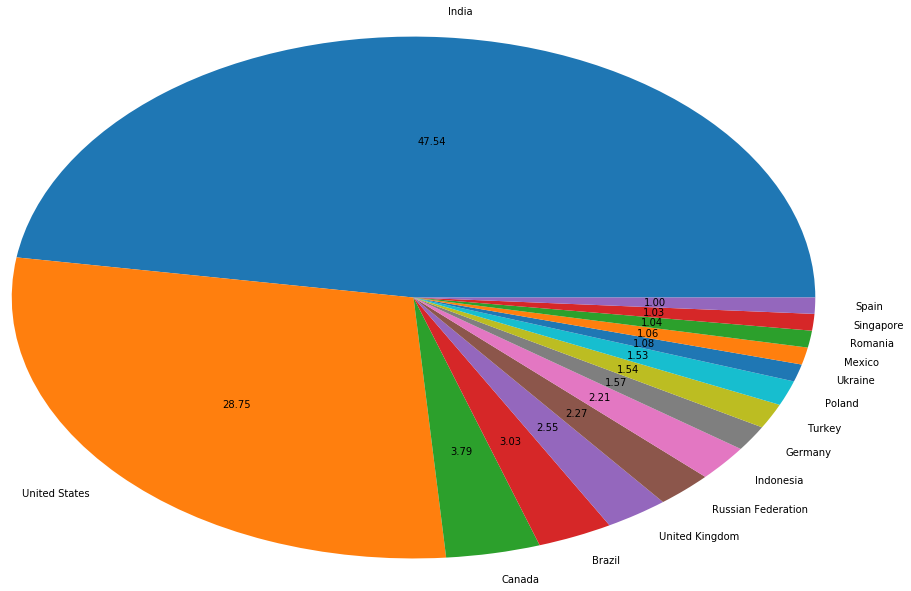

In [24]:
pointsPerCountry = {}
for index, row in scoreFrame.iterrows():
    if row['country'] in pointsPerCountry:  
        pointsPerCountry[row['country']] += row['score']
    else:
        pointsPerCountry[row['country']] = row['score']
        
import operator
sorted_points = sorted(pointsPerCountry.items(), key=operator.itemgetter(1), reverse=True)

sorted_points_lab = [k[0] for k in sorted_points][:15]
sorted_points_vals = [k[1] for k in sorted_points][:15]

pl = plt.pie(sorted_points_vals, labels=sorted_points_lab, autopct='%.2f', radius=3)